## Outlier detection techniques
Outlier detection plays an important role in financial transaction. This tutorial guides you to tackle this problems.   
1. __Using K-Mean__


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, labels = make_blobs(100,centers=1)

In [3]:
kmeans = KMeans(n_clusters=1)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
# identifying the five closest points
distances = kmeans.transform(X)

In [5]:
# First return an array of indexes in ascending order with argsort, the reverse it by [::-1], finallly get top five with [:5]
sorted_idx = np.argsort(distances.ravel())[::-1][:5]


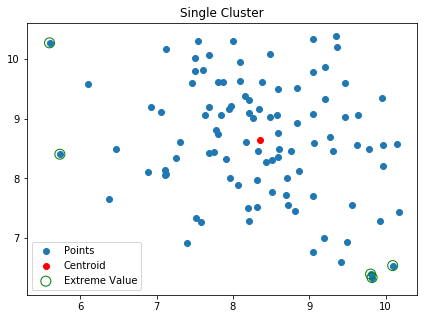

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
f,ax =plt.subplots(figsize=[7,5])
ax.set_title("Single Cluster")
ax.scatter(X[:,0],X[:,1], label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],label='Centroid',color='r')
ax.scatter(X[sorted_idx][:,0],X[sorted_idx][:,1],label='Extreme Value',edgecolors='g', facecolors='none',s=100)
ax.legend(loc='best')

In [10]:
# remove these points 
new_X =np.delete(X, sorted_idx, axis =0)

In [11]:
# update a new centroid due to removal extreme
new_kmeans = KMeans(n_clusters=1)
new_kmeans.fit(new_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

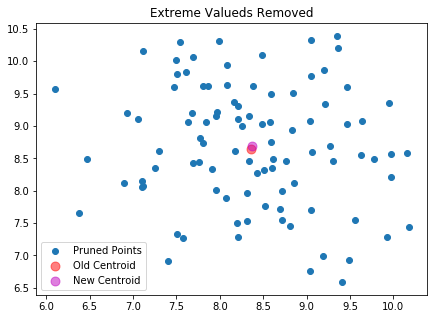

In [13]:
# Viaualize again new centroid against old centroid
f, ax = plt.subplots(figsize=(7,5))
ax.set_title("Extreme Valueds Removed")
ax.scatter(new_X[:,0], new_X[:,1],label='Pruned Points')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label='Old Centroid', color='r',s=80, alpha=.5)
ax.scatter(new_kmeans.cluster_centers_[:,0],new_kmeans.cluster_centers_[:,1],label='New Centroid', color='m',s=80, alpha=.5)
ax.legend(loc='best')

2.__Using one-class SVM__